<a href="https://colab.research.google.com/github/doeungim/ADP_DE2/blob/main/ADP_29.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
#!sudo apt-get install -y fonts-nanum

#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf

#import matplotlib.pyplot as plt
#plt.rc('font', family='NanumBarunGothic')

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
pd.set_option('display.max_columns',200)

#sample etc.
import numpy as np

# vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

#pca
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#t-test
from scipy.stats import ttest_ind


#modeling
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier , DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error , r2_score , f1_score
from sklearn.linear_model import LinearRegression , LogisticRegression

import warnings
warnings.filterwarnings('ignore')


from imblearn.over_sampling import SMOTE
import xgboost as xgb
import scipy.stats as stats
import math
from scipy.stats import chi2_contingency, ttest_ind
from statsmodels.stats.multicomp import pairwise_tukeyhsd

import matplotlib.pyplot as plt


In [3]:
df =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/29/p1.csv',encoding= 'utf-8')


###### ‚úÖ 1-1 Í≥ÑÏïΩÏûêÍ≥†Ïú†Î≤àÌò∏Î•º Í∏∞Ï§ÄÏúºÎ°ú Í±∞Ï£ºÏó∞ÎèÑ Î≥Ñ Ïó¨Îü¨Í∞úÏùò Îç∞Ïù¥ÌÑ∞Í∞Ä ÏåìÏó¨ ÏûàÎã§. Í∞Å Í≥ÑÏïΩÏûêÍ≥†Ïú†Î≤àÌò∏Ïóê ÎåÄÌï¥ Í∞ÄÏû• ÏµúÏã†Ïùò Í±∞Ï£ºÏó∞ÎèÑ ÌñâÎßå ÎÇ®Í≤®Îùº

In [4]:
# Í±∞Ï£º Ïó∞ÎèÑ
year_map = df.groupby('Í≥ÑÏïΩÏûêÍ≥†Ïú†Î≤àÌò∏')['Í±∞Ï£ºÏó∞ÎèÑ'].max().to_dict()

# Mapping Í≥ÑÏïΩÏûê Í≥†Ïú†Î≤àÌò∏ Í∏∞Ï§ÄÏúºÎ°ú mapÌïòÏó¨ Í∞Å Í≥†Ïú†Î≤àÌò∏Î≥Ñ ÏµúÏã† Îç∞Ïù¥ÌÑ∞Î•º ÎÇòÌÉÄÎÇ¥Îäî Ïª¨Îüº Ï∂îÍ∞Ä
df['new_year'] = df['Í≥ÑÏïΩÏûêÍ≥†Ïú†Î≤àÌò∏'].map(year_map)

# ÏµúÏã†Îç∞Ïù¥ÌÑ∞ÏôÄ Í∞ôÏùÄ Í±∞Ï£º Ïó∞ÎèÑ ÌïÑÌÑ∞ÎßÅ
df = df[df['Í±∞Ï£ºÏó∞ÎèÑ'] == df['new_year']]

# Í≥ÑÏïΩÏûêÍ≥†Ïú†Î≤àÌò∏ Ï§ëÎ≥µÌñâ Ï†úÍ±∞
df1 = df.sort_values(['Í≥ÑÏïΩÏûêÍ≥†Ïú†Î≤àÌò∏','Í±∞Ï£ºÏó∞ÎèÑ']).drop_duplicates(['Í≥ÑÏïΩÏûêÍ≥†Ïú†Î≤àÌò∏'], keep = 'last').reset_index()


# Simple Code
# df.sort_values(['Í≥ÑÏïΩÏûêÍ≥†Ïú†Î≤àÌò∏','Í±∞Ï£ºÏó∞ÎèÑ']).drop_duplicates('Í≥ÑÏïΩÏûêÍ≥†Ïú†Î≤àÌò∏',keep='last').reset_index(drop=True)

###### ‚úÖ 1.2 Í≤∞Ï∏°ÏπòÏ≤òÎ¶¨

In [5]:
# Í≥ÑÏïΩÍµ¨Î∂Ñ, ÏïÑÌååÌä∏ ÌèâÏ†ê, Ìá¥Í±∞Ïó∞ÎèÑ
print(df1.isna().sum().to_frame().T)

# Í≥ÑÏïΩÍµ¨Î∂Ñ : Ìá¥Í±∞Ïó¨Î∂Ä (Ìá¥Í±∞/ÎØ∏Ìá¥Í±∞ Íµ¨Î∂Ñ) - Ìá¥Í±∞Ïù¥Î©¥ Í≥ÑÏïΩÍµ¨Î∂Ñ Ìï¥ÏßÄ / ÎØ∏Ìá¥Í±∞Ïù¥Î©¥ Ïú†Ìö®Î°ú Ï†ÅÏö©
df1['Í≥ÑÏïΩÍµ¨Î∂Ñ'] =  df1.apply(lambda x : 'Ìï¥ÏßÄ' if x['Ìá¥Í±∞Ïó¨Î∂Ä'] == 'Ìá¥Í±∞' else 'Ïú†Ìö®' , axis = 1)


# ÏïÑÌååÌä∏ ÌèâÏ†ê - ÏïÑÌååÌä∏Ïù¥Î¶ÑÎ≥Ñ ÏïÑÌååÌä∏ ÌèâÏ†ê ÎîïÏÖîÎÑàÎ¶¨Î°ú Í≤∞Ï∏°Ïπò Ï±ÑÏö∞Í∏∞
apart_score = df1.groupby('ÏïÑÌååÌä∏ Ïù¥Î¶Ñ')['ÏïÑÌååÌä∏ ÌèâÏ†ê'].mean().to_dict()
df1['ÏïÑÌååÌä∏ ÌèâÏ†ê'] = df1['ÏïÑÌååÌä∏ ÌèâÏ†ê'].fillna(df1['ÏïÑÌååÌä∏ Ïù¥Î¶Ñ'].map(apart_score)) #ÏïÑÌååÌä∏ Ïù¥Î¶Ñ map ÎåÄÏÉÅ

# Ìá¥Í±∞Ïó∞ÎèÑ
df1[df1['Ìá¥Í±∞Ïó∞ÎèÑ'].isna()]['Ìá¥Í±∞Ïó¨Î∂Ä'].value_counts() # ÎØ∏Ìá¥Í±∞ ÏÉÅÌÉú >> Î∂àÌïÑÏöîÌïú Ïª¨ÎüºÏúºÎ°ú ÏÇ≠Ï†ú


df2 = df1.drop(columns = ['index','ÏàúÎ≤à', 'Ìá¥Í±∞Ïó∞ÎèÑ', 'new_year', 'ÏïÑÌååÌä∏ Ïù¥Î¶Ñ'])

print("""
Í≤∞Ï∏°ÏπòÎäî Í≥ÑÏïΩ Íµ¨Î∂Ñ, ÏïÑÌååÌä∏ ÌèâÏ†ê, Ìá¥Í±∞Ïó∞ÎèÑÏóê ÏûàÏúºÎ©∞, Îã§ÏùåÍ≥º Í∞ôÏù¥ Í≤∞Ï∏°ÏπòÎ•º Ï≤òÎ¶¨ÌïúÎã§
1) Í≥ÑÏïΩ Íµ¨Î∂Ñ : Ìá¥Í±∞Ïó¨Î∂ÄÏóê Îî∞Îùº Ìá¥Í±∞Ïù¥Î©¥ Í≥ÑÏïΩÍµ¨Î∂Ñ Ìï¥ÏßÄ / ÎØ∏Ìá¥Í±∞Ïù¥Î©¥ Ïú†Ìö®Î°ú Ï†ÅÏö©
2) ÏïÑÌååÌä∏ ÌèâÏ†ê : ÏïÑÌååÌä∏Ïù¥Î¶ÑÎ≥Ñ ÏïÑÌååÌä∏ ÌèâÏ†ê ÎîïÏÖîÎÑàÎ¶¨Î°ú Í≤∞Ï∏°Ïπò Ï±ÑÏö∞Í∏∞
3) Ìá¥Í±∞Ïó∞ÎèÑ : Í≤∞Ï∏°Ïùò Îç∞Ïù¥ÌÑ∞Í∞Ä ÎØ∏Ìá¥Í±∞ ÏÉÅÌÉú, Ïú†Ìö®Ìïú ÏÉÅÌÉúÏù¥Í∏∞ ÎïåÎ¨∏Ïóê Í∏∞Î°ùÏù¥ ÏïàÎêòÎäî Í≤ÉÏù¥ ÎÖºÎ¶¨Ï†ÅÏúºÎ°ú ÎßûÎã§Í≥† ÌåêÎã®, Ïª¨ÎüºÏùÑ ÏÇ≠Ï†úÌïúÎã§.

Í≤∞Ï∏° Ï≤òÎ¶¨ÌõÑ, Î∂àÌïÑÏöîÌïòÎã§Í≥† ÏÉùÍ∞ÅÎêòÎäî Ïª¨ÎüºÎì§ÏùÑ ÏÇ≠Ï†úÌïòÏó¨ df2Î°ú Ï†ÄÏû•ÌïúÎã§.
""")



   index  ÏàúÎ≤à  Í≥ÑÏïΩÍµ¨Î∂Ñ  Ïû¨Í≥ÑÏïΩÌöüÏàò  Í±∞Ï£ºÍ∞úÏõî  ÏïÑÌååÌä∏ Ïù¥Î¶Ñ  ÏïÑÌååÌä∏ ID  ÏïÑÌååÌä∏ ÌèâÏ†ê  Ìò∏Ïã§Í≥†Ïú†Î≤àÌò∏  Ï∏µ  ÌèâÌòïÎåÄ  \
0      0   0    61      0     0       0       0     141       0  0    0   

   Í≥ÑÏïΩÏûêÍ≥†Ïú†Î≤àÌò∏  Í≥ÑÏïΩÏÑúÍ≥†Ïú†Î≤àÌò∏  ÏûÖÏ£ºÏó∞ÎèÑ  Ìá¥Í±∞Ïó∞ÎèÑ  Í±∞Ï£ºÏó∞ÎèÑ  ÏõîÏÑ∏(Ïõê)  Î≥¥Ï¶ùÍ∏à(Ïõê)  ÎåÄÌëúÎÇòÏù¥  ÎÇòÏù¥  ÏÑ±Î≥Ñ  Í≤∞ÌòºÏó¨Î∂Ä  \
0        0        0     0  6257     0      0       0     0   0   0     0   

   Í±∞Ï£ºÏûê Ïàò  Ìá¥Í±∞Ïó¨Î∂Ä  new_year  
0      0     0         0  

Í≤∞Ï∏°ÏπòÎäî Í≥ÑÏïΩ Íµ¨Î∂Ñ, ÏïÑÌååÌä∏ ÌèâÏ†ê, Ìá¥Í±∞Ïó∞ÎèÑÏóê ÏûàÏúºÎ©∞, Îã§ÏùåÍ≥º Í∞ôÏù¥ Í≤∞Ï∏°ÏπòÎ•º Ï≤òÎ¶¨ÌïúÎã§
1) Í≥ÑÏïΩ Íµ¨Î∂Ñ : Ìá¥Í±∞Ïó¨Î∂ÄÏóê Îî∞Îùº Ìá¥Í±∞Ïù¥Î©¥ Í≥ÑÏïΩÍµ¨Î∂Ñ Ìï¥ÏßÄ / ÎØ∏Ìá¥Í±∞Ïù¥Î©¥ Ïú†Ìö®Î°ú Ï†ÅÏö©
2) ÏïÑÌååÌä∏ ÌèâÏ†ê : ÏïÑÌååÌä∏Ïù¥Î¶ÑÎ≥Ñ ÏïÑÌååÌä∏ ÌèâÏ†ê ÎîïÏÖîÎÑàÎ¶¨Î°ú Í≤∞Ï∏°Ïπò Ï±ÑÏö∞Í∏∞
3) Ìá¥Í±∞Ïó∞ÎèÑ : Í≤∞Ï∏°Ïùò Îç∞Ïù¥ÌÑ∞Í∞Ä ÎØ∏Ìá¥Í±∞ ÏÉÅÌÉú, Ïú†Ìö®Ìïú ÏÉÅÌÉúÏù¥Í∏∞ ÎïåÎ¨∏Ïóê Í∏∞Î°ùÏù¥ ÏïàÎêòÎäî Í≤ÉÏù¥ ÎÖºÎ¶¨Ï†ÅÏúºÎ°ú ÎßûÎ

###### ‚úÖ 1.3 Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨

In [6]:
# 1) ÏàòÏπòÌòï Î≥ÄÏàòÎì§Ïùò ÌÜµÍ≥ÑÎüâ ÌôïÏù∏
display(df2[df2.select_dtypes(exclude = 'object').columns].describe())

numeric_df = df2[df2.select_dtypes(exclude = 'object').columns]
plt.figure(figsize = (10, 4))

numeric_df.boxplot()
plt.tight_layout()
plt.show()

print("""
ÎåÄÌëúÎÇòÏù¥Îäî 75%ÏôÄ ÏµúÎåÄ ÏàòÏπò 121Î°ú ÎÇòÏù¥Ïóê Ïù¥ÏÉÅÏπòÍ∞Ä ÏûàÎäîÍ≤ÉÏúºÎ°ú Î≥¥Ïó¨ÏßÑÎã§.  90ÏÑ∏ Ïù¥ÏÉÅÏùò Îç∞Ïù¥ÌÑ∞Îäî 90ÏúºÎ°ú ÎßûÏ∂òÎã§.
Î≥¥Ï¶ùÍ∏à Î∞ïÏä§ ÌîåÎ°ØÏóêÏÑú Ïù¥ÏÉÅÏπòÍ∞Ä ÎßéÏùÄ Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇòÏßÄÎßå, ÏïÑÌååÌä∏ Í≥ÑÏïΩÏóê Îî∞Î•∏ Î≥¥Ï¶ùÍ∏àÏùò Î≤îÏúÑÍ∞Ä Îã§ÏñëÌïòÎã§Îäî Ï†êÏùÑ Í≥†Î†§ÌïòÏó¨, Ïù¥ÏÉÅÏπòÎ°ú Î≥¥ÏßÄ ÏïäÎäîÎã§.
""")

# 2) ÎÇòÏù¥ Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨
df2['ÎÇòÏù¥'] = df2.apply(lambda x  : 90 if x['ÎÇòÏù¥'] >= 90 else x['ÎÇòÏù¥'], axis = 1)
df2['ÎåÄÌëúÎÇòÏù¥'] = df2.apply(lambda x  : 90 if x['ÎåÄÌëúÎÇòÏù¥'] >= 90 else x['ÎåÄÌëúÎÇòÏù¥'], axis = 1)

# Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨ ÌõÑÏùò df3
df3 = df2.copy()
#display(df3[df3.select_dtypes(exclude = 'object').columns].describe()) #Ï≤òÎ¶¨ ÌôïÏù∏

Ïû¨Í≥ÑÏïΩÌöüÏàò          Í±∞Ï£ºÍ∞úÏõî        ÏïÑÌååÌä∏ ID        ÏïÑÌååÌä∏ ÌèâÏ†ê        Ìò∏Ïã§Í≥†Ïú†Î≤àÌò∏  \
count  10348.000000  10348.000000  10348.000000  10348.000000  10348.000000   
mean       5.873695    137.773579      1.809432      6.363645  42980.835330   
std        3.215195     77.544927      0.866580      1.284676  25016.449224   
min        1.000000      1.000000      1.000000      5.000000      1.000000   
25%        3.000000     71.000000      1.000000      5.000000  21277.750000   
50%        6.000000    137.000000      2.000000      7.000000  42946.000000   
75%        9.000000    222.000000      2.000000      7.000000  64589.500000   
max       12.000000    323.000000      5.000000     10.000000  86891.000000   

                  Ï∏µ           ÌèâÌòïÎåÄ       Í≥ÑÏïΩÏûêÍ≥†Ïú†Î≤àÌò∏       Í≥ÑÏïΩÏÑúÍ≥†Ïú†Î≤àÌò∏          ÏûÖÏ£ºÏó∞ÎèÑ  \
count  10348.000000  10348.000000  10348.000000  10348.000000  10348.000000   
mean       7.861229     13.220236  48508.618187  46320.571415   2007.092482   
std        4.284426      2.338369  26845.947221  26014.408368      6.224812   
min        1.000000     12.000000      1.000000      1.000000   1994.000000   
25%        4.000000     12.000000  25058.750000  23252.000000   2002.000000   
50%        8.000000     12.000000  48593.500000  48036.500000   2004.000000   
75%       12.000000     12.000000  74050.250000  69061.250000   2012.000000   
max       15.000000     19.000000  86892.000000  86904.000000   2020.000000   

               Í±∞Ï£ºÏó∞ÎèÑ          ÏõîÏÑ∏(Ïõê)        Î≥¥Ï¶ùÍ∏à(Ïõê)          ÎåÄÌëúÎÇòÏù¥            ÎÇòÏù¥  \
count  10348.000000   10348.000000  1.034800e+04  10348.000000  10348.000000   
mean    2017.752319   63941.468883  3.807054e+06     65.874758     62.627078   
std        3.639131   40259.713978  3.087981e+06     13.787216     14.179781   
min     2008.000000   31300.000000  1.520000e+06     21.000000     20.000000   
25%     2016.000000   42300.000000  2.052000e+06     57.000000     54.000000   
50%     2020.000000   44700.000000  2.304000e+06     65.000000     63.000000   
75%     2020.000000   66700.000000  3.943000e+06     75.000000     73.000000   
max     2020.000000  311080.000000  2.078400e+07    121.000000    120.000000   

              Í±∞Ï£ºÏûê Ïàò  
count  10348.000000  
mean       1.688152  
std        0.985380  
min        1.000000  
25%        1.000000  
50%        1.000000  
75%        2.000000  
max       10.000000


ÎåÄÌëúÎÇòÏù¥Îäî 75%ÏôÄ ÏµúÎåÄ ÏàòÏπò 121Î°ú ÎÇòÏù¥Ïóê Ïù¥ÏÉÅÏπòÍ∞Ä ÏûàÎäîÍ≤ÉÏúºÎ°ú Î≥¥Ïó¨ÏßÑÎã§.  90ÏÑ∏ Ïù¥ÏÉÅÏùò Îç∞Ïù¥ÌÑ∞Îäî 90ÏúºÎ°ú ÎßûÏ∂òÎã§.
Î≥¥Ï¶ùÍ∏à Î∞ïÏä§ ÌîåÎ°ØÏóêÏÑú Ïù¥ÏÉÅÏπòÍ∞Ä ÎßéÏùÄ Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇòÏßÄÎßå, ÏïÑÌååÌä∏ Í≥ÑÏïΩÏóê Îî∞Î•∏ Î≥¥Ï¶ùÍ∏àÏùò Î≤îÏúÑÍ∞Ä Îã§ÏñëÌïòÎã§Îäî Ï†êÏùÑ Í≥†Î†§ÌïòÏó¨, Ïù¥ÏÉÅÏπòÎ°ú Î≥¥ÏßÄ ÏïäÎäîÎã§.



###### ‚úÖ 2.1 Ïû¨Í≥ÑÏïΩ ÌöüÏàòÏùò Ï§ëÏïôÍ∞íÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Ï§ëÏïôÍ∞íÎ≥¥Îã§ ÌÅ¨Í±∞ÎÇò Í∞ôÏúºÎ©¥ 'ÎÜíÏùå', ÏûëÏúºÎ©¥ 'ÎÇÆÏùå' ÏúºÎ°ú Ïû¨Í≥ÑÏïΩ ÌöüÏàò Ïù¥Î∂Ñ Î≥ÄÏàòÎ•º Íµ¨ÏÑ±

In [7]:
# df3
m = df3['Ïû¨Í≥ÑÏïΩÌöüÏàò'].median()
df3['Ïû¨Í≥ÑÏïΩ_Ïù¥Î∂ÑÎ≥ÄÏàò'] = df3['Ïû¨Í≥ÑÏïΩÌöüÏàò'].apply(lambda x : 'ÎÜíÏùå' if x >= m else 'ÎÇÆÏùå')

###### ‚úÖ 2.2 Ï∞®ÏõêÏ∂ïÏÜåÏùò ÌïÑÏöîÏÑ±ÏùÑ ÎÖºÌïòÍ≥†, ÌïÑÏöîÏóê Îî∞Îùº Ï∞®ÏõêÏùÑ Ï∂ïÏÜåÌïòÍ≥† Î∂àÌïÑÏöîÌïòÎã§Î©¥ Í∑∏ Í∑ºÍ±∞

In [8]:
# Ï∞®Ïõê Ï∂ïÏÜåÏùò ÌåêÎã® Î∞©Î≤ï
# 1) ÏÉÅÍ¥ÄÎ∂ÑÏÑù - ÏÑúÎ°ú Í∞ïÌïú ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Í∞ÄÏßÄÎäî Ïª¨ÎüºÎì§ÏùÄ Ï†ïÎ≥¥Í∞Ä Ï§ëÎ≥µÎêú Í∞ÄÎä•ÏÑ± - Ï∞®Ïõê Ï∂ïÏÜå ÌïÑÏöî
# 2) Îã§Ï§ëÍ≥µÏÑ†ÏÑ± (VIF) - Í≥µÏÑ†ÏÑ± Î¨∏Ï†úÍ∞Ä ÏûàÏùÑ Ïàò ÏûàÍ∏∞ ÎïåÎ¨∏Ïóê Ï∞®Ïõê Ï∂ïÏÜå Î≥ÄÏàò Ï†úÍ±∞ ÌïÑÏöî
# Í∞ôÏùÄ ÏõêÎ≥∏ ÏàòÏπòÌòï Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ÏÑú ÏÉÅÍ¥ÄÎ∂ÑÏÑùÍ≥º VIFÎ•º Î≥ëÌñâÌïòÏó¨ Ï∞®Ïõê ÌïÑÏöîÏùò Ï§ëÏöîÏÑ±ÏùÑ ÌåêÎã®

# 1) ÏÉÅÍ¥ÄÎ∂ÑÏÑù
# Ïó∞ÏÜçÌòï ÏàòÏπò Î≥ÄÏàòÎì§Ïùò ÏÑ†ÌòïÍ¥ÄÍ≥ÑÎ•º Ï∏°Ï†ï
# Î≤îÏ£ºÌòï Î≥ÄÏàòÎ•º Ìè¨Ìï®ÌïòÍ≥† Ïã∂ÏùÄ Í≤ΩÏö∞ Ï†ÑÏ≤òÎ¶¨(get_dummies) Ïã§Ìñâ / Îã®, Ïù¥ÏßÑÌôîÎêú Í≤ΩÏö∞ ÏÉÅÍ¥ÄÍ≥ÑÏàòÏùò Ìï¥ÏÑùÏù¥ Î™®Ìò∏Ìï¥ÏßÄÍ≥†, ÏàúÏÑúÍ∞Ä ÏóÜÎäî Î≤îÏ£ºÌòï
# Î≥ÄÏàòÏóê Label EncodingÏùÑ Ïì∞Î©¥ ÏàòÏπòÏ†Å Í¥ÄÍ≥ÑÏóê Ïò§Î•ò Î∞úÏÉù

# df4 < Î∂àÌïÑÏöîÌïú Ïª¨Îüº Ï†úÍ±∞
df4 = df3.drop(columns = ['ÏïÑÌååÌä∏ ID', 'Ìò∏Ïã§Í≥†Ïú†Î≤àÌò∏','Í≥ÑÏïΩÏûêÍ≥†Ïú†Î≤àÌò∏','Í≥ÑÏïΩÏÑúÍ≥†Ïú†Î≤àÌò∏','ÎåÄÌëúÎÇòÏù¥'])


cor_mat = df4[df4.select_dtypes(exclude = 'object').columns].corr().abs()
f, ax = plt.subplots(figsize = (15, 7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(cor_mat, cmap = cmap, annot = True)


# Î≥ÄÏàò Ï†úÍ±∞
cor_df = cor_mat.unstack().reset_index().rename(columns = {'level_0':'col1', 'level_1':'col2', 0 : 'corr'})

remove_col = cor_df[(cor_df['col1'] != cor_df['col2']) & (cor_df['corr'] >= 0.7)]
print(remove_col)

print("""
ÏÉÅÍ¥ÄÎ∂ÑÏÑùÏùÑ ÌÜµÌï¥ Î≥ÄÏàò Í∞Ñ Ï§ëÎ≥µÏÑ± Ïó¨Î∂ÄÎ•º ÌåêÎã®ÌïúÎã§.  ÏÉÅÍ¥ÄÍ≥ÑÏàòÍ∞Ä 0.7Ïù¥ÏÉÅ Í∞ÄÏßÄÎäî Ïª¨ÎüºÎì§Ïùò ÏåçÏùÑ Ï∂úÎ†•Ìï¥Î≥∏ Í≤∞Í≥º
ÎèôÏùºÌïòÍ±∞ÎÇò Ïú†ÏÇ¨Ìïú Ï†ïÎ≥¥Î•º Ïó¨Îü¨ Î≥ÄÏàòÍ∞Ä Î∞òÎ≥µÏ†ÅÏúºÎ°ú Ìè¨Ìï®ÌïòÍ≥† ÏûàÎã§Îäî Ï†êÏùÑ ÎßêÌïòÎ©∞, Ï†ïÎ≥¥Ïùò Ï§ëÎ≥µÏÑ±Ïù¥ ÎÜíÎã§Îäî ÎúªÏù¥Îã§.
ÏàòÏπòÌòï Î≥ÄÏàò Ï§ëÏùò ÏùºÎ∂ÄÎäî PCAÎì±Ïùò Ï∞®Ïõê Ï∂ïÏÜåÎ•º ÌÜµÌï¥ Ï†ïÎ≥¥ Ï§ëÎ≥µÏùÑ Ï†úÍ±∞ÌïòÍ≥†, ÌïµÏã¨ Ï†ïÎ≥¥Îßå ÏïïÏ∂ïÌïòÏó¨ ÏïïÏ∂ïÌï† ÌïÑÏöîÍ∞Ä ÏûàÏñ¥ Î≥¥Ïù∏Îã§.
ÏòàÎ•º Îì§Ïñ¥, ÏõîÏÑ∏ÏôÄ Î≥¥Ï¶ùÍ∏àÏùÄ ÌïòÎÇòÏùò Ï£ºÏÑ±Î∂ÑÏúºÎ°ú ÌëúÌòÑÌï¥ÎèÑ Ï†ÑÏ≤¥ Ï†ïÎ≥¥Ïùò ÏÜêÏã§Ïù¥ ÌÅ¨ÏßÄ ÏïäÏùÑ Í≤ÉÏúºÎ°ú ÌåêÎã®ÎêúÎã§.
""")

      col1    col2      corr
1    Ïû¨Í≥ÑÏïΩÌöüÏàò    Í±∞Ï£ºÍ∞úÏõî  0.961945
5    Ïû¨Í≥ÑÏïΩÌöüÏàò    ÏûÖÏ£ºÏó∞ÎèÑ  0.737800
11    Í±∞Ï£ºÍ∞úÏõî   Ïû¨Í≥ÑÏïΩÌöüÏàò  0.961945
16    Í±∞Ï£ºÍ∞úÏõî    ÏûÖÏ£ºÏó∞ÎèÑ  0.799087
55    ÏûÖÏ£ºÏó∞ÎèÑ   Ïû¨Í≥ÑÏïΩÌöüÏàò  0.737800
56    ÏûÖÏ£ºÏó∞ÎèÑ    Í±∞Ï£ºÍ∞úÏõî  0.799087
85   ÏõîÏÑ∏(Ïõê)  Î≥¥Ï¶ùÍ∏à(Ïõê)  0.982391
95  Î≥¥Ï¶ùÍ∏à(Ïõê)   ÏõîÏÑ∏(Ïõê)  0.982391

ÏÉÅÍ¥ÄÎ∂ÑÏÑùÏùÑ ÌÜµÌï¥ Î≥ÄÏàò Í∞Ñ Ï§ëÎ≥µÏÑ± Ïó¨Î∂ÄÎ•º ÌåêÎã®ÌïúÎã§.  ÏÉÅÍ¥ÄÍ≥ÑÏàòÍ∞Ä 0.7Ïù¥ÏÉÅ Í∞ÄÏßÄÎäî Ïª¨ÎüºÎì§Ïùò ÏåçÏùÑ Ï∂úÎ†•Ìï¥Î≥∏ Í≤∞Í≥º
ÎèôÏùºÌïòÍ±∞ÎÇò Ïú†ÏÇ¨Ìïú Ï†ïÎ≥¥Î•º Ïó¨Îü¨ Î≥ÄÏàòÍ∞Ä Î∞òÎ≥µÏ†ÅÏúºÎ°ú Ìè¨Ìï®ÌïòÍ≥† ÏûàÎã§Îäî Ï†êÏùÑ ÎßêÌïòÎ©∞, Ï†ïÎ≥¥Ïùò Ï§ëÎ≥µÏÑ±Ïù¥ ÎÜíÎã§Îäî ÎúªÏù¥Îã§.
ÏàòÏπòÌòï Î≥ÄÏàò Ï§ëÏùò ÏùºÎ∂ÄÎäî PCAÎì±Ïùò Ï∞®Ïõê Ï∂ïÏÜåÎ•º ÌÜµÌï¥ Ï†ïÎ≥¥ Ï§ëÎ≥µÏùÑ Ï†úÍ±∞ÌïòÍ≥†, ÌïµÏã¨ Ï†ïÎ≥¥Îßå ÏïïÏ∂ïÌïòÏó¨ ÏïïÏ∂ïÌï† ÌïÑÏöîÍ∞Ä ÏûàÏñ¥ Î≥¥Ïù∏Îã§.
ÏòàÎ•º Îì§Ïñ¥, ÏõîÏÑ∏ÏôÄ Î≥¥Ï¶ùÍ∏àÏùÄ ÌïòÎÇòÏùò Ï£ºÏÑ±Î∂ÑÏúºÎ°ú ÌëúÌòÑÌï¥ÎèÑ Ï†ÑÏ≤¥ Ï†ïÎ≥¥Ïùò ÏÜêÏã§Ïù¥ ÌÅ¨ÏßÄ ÏïäÏùÑ Í≤ÉÏúºÎ°ú ÌåêÎã®ÎêúÎã§

In [9]:
# 2) VIF
numeric_df = df4[df4.select_dtypes(exclude = 'object').columns]

vif = pd.DataFrame()
vif['cols'] = numeric_df.columns

vif['vif'] = [variance_inflation_factor(numeric_df.values, i) for i in range(numeric_df.shape[1])]
vif.sort_values('vif').reset_index(drop = True)

print(vif[vif['vif'] > 10])
print("""
Îã§Ï§ë Í≥µÏÑ†ÏÑ± ÏßÄÌëúÏù∏ VIF > 10 Í∏∞Ï§ÄÏúºÎ°ú Ïª¨ÎüºÏùÑ Ï°∞ÌöåÌï¥Î≥∏ Í≤∞Í≥º, ÏûÖÏ£ºÏó∞ÎèÑ, Í±∞Ï£º Ïó∞ÎèÑ, Î≥¥Ï¶ùÍ∏à, ÏõîÏÑ∏ Îì±ÏùÄ ÏÑúÎ°ú Ïú†ÏÇ¨Ìïú Ï†ïÎ≥¥Î•º Ï§ëÎ≥µÌï¥ÏÑú
Îã¥Í≥† ÏûàÏùÑ Í∞ÄÎä•ÏÑ±Ïù¥ ÌÅ¨Îã§. ÏÉÅÍ¥ÄÍ≥ÑÏàòÎ•º ÌôïÏù∏ÌñàÏùÑ ÎïåÏôÄ ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú Ï∞®Ïõê Ï∂ïÏÜåÍ∞Ä ÌïÑÏöîÌï¥Î≥¥Ïù∏Îã§.
""")

     cols           vif
0   Ïû¨Í≥ÑÏïΩÌöüÏàò  6.808665e+01
1    Í±∞Ï£ºÍ∞úÏõî  7.265898e+02
2  ÏïÑÌååÌä∏ ÌèâÏ†ê  2.797049e+01
4     ÌèâÌòïÎåÄ  4.674858e+01
5    ÏûÖÏ£ºÏó∞ÎèÑ  1.471390e+07
6    Í±∞Ï£ºÏó∞ÎèÑ  1.487124e+07
7   ÏõîÏÑ∏(Ïõê)  1.307402e+02
8  Î≥¥Ï¶ùÍ∏à(Ïõê)  8.966750e+01
9      ÎÇòÏù¥  2.400649e+01

Îã§Ï§ë Í≥µÏÑ†ÏÑ± ÏßÄÌëúÏù∏ VIF > 10 Í∏∞Ï§ÄÏúºÎ°ú Ïª¨ÎüºÏùÑ Ï°∞ÌöåÌï¥Î≥∏ Í≤∞Í≥º, ÏûÖÏ£ºÏó∞ÎèÑ, Í±∞Ï£º Ïó∞ÎèÑ, Î≥¥Ï¶ùÍ∏à, ÏõîÏÑ∏ Îì±ÏùÄ ÏÑúÎ°ú Ïú†ÏÇ¨Ìïú Ï†ïÎ≥¥Î•º Ï§ëÎ≥µÌï¥ÏÑú
Îã¥Í≥† ÏûàÏùÑ Í∞ÄÎä•ÏÑ±Ïù¥ ÌÅ¨Îã§. ÏÉÅÍ¥ÄÍ≥ÑÏàòÎ•º ÌôïÏù∏ÌñàÏùÑ ÎïåÏôÄ ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú Ï∞®Ïõê Ï∂ïÏÜåÍ∞Ä ÌïÑÏöîÌï¥Î≥¥Ïù∏Îã§.



PC_0      PC_1      PC_2      PC_3      PC_4      PC_5      PC_6  \
ratio   0.314581  0.167678  0.125592  0.094149  0.089340  0.080994  0.070209   
cumsum  0.314581  0.482260  0.607852  0.702001  0.791341  0.872335  0.942544   

            PC_7      PC_8      PC_9     PC_10  
ratio   0.051675  0.004397  0.001192  0.000192  
cumsum  0.994219  0.998616  0.999808  1.000000


PCA Î∂ÑÏÑù Í≤∞Í≥º, Ï†ÑÏ≤¥ 11Í∞úÏùò Ï£ºÏÑ±Î∂Ñ Ï§ë ÏÉÅÏúÑ 6Í∞úÏùò Ï£ºÏÑ±Î∂ÑÎßåÏúºÎ°ú Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÇ∞Ïùò ÏïΩ 87%Î•º ÏÑ§Î™ÖÌï† Ïàò ÏûàÏóàÎã§.
Ïù¥Îäî ÏùºÎ∞òÏ†ÅÏúºÎ°ú ÏÇ¨Ïö©ÎêòÎäî Ï∞®Ïõê Ï∂ïÏÜå Í∏∞Ï§Ä(ÎàÑÏ†Å ÏÑ§Î™ÖÎ†• 80~90%)ÏùÑ ÎßåÏ°±ÌïòÎØÄÎ°ú,
Ï†ïÎ≥¥ ÏÜêÏã§ ÏóÜÏù¥ Ï∞®ÏõêÏùÑ ÏïΩ Ï†àÎ∞òÏúºÎ°ú Ï∂ïÏÜåÌï† Ïàò ÏûàÎäî Í∑ºÍ±∞Í∞Ä ÎêúÎã§.

Îî∞ÎùºÏÑú, Î≥∏ Îç∞Ïù¥ÌÑ∞Îäî Ï∞®Ïõê Ï∂ïÏÜåÎ•º ÌÜµÌï¥ Î≥ÄÏàò ÏàòÎ•º Ï§ÑÏù¥Îêò,
ÌïµÏã¨ Ï†ïÎ≥¥Îäî ÎåÄÎ∂ÄÎ∂Ñ Ïú†ÏßÄÌï† Ïàò ÏûàÏñ¥ Ï∞®Ïõê Ï∂ïÏÜåÏùò Ï†ÅÏö©Ïù¥ ÌÉÄÎãπÌïòÍ≥† Í∂åÏû•ÎêúÎã§.




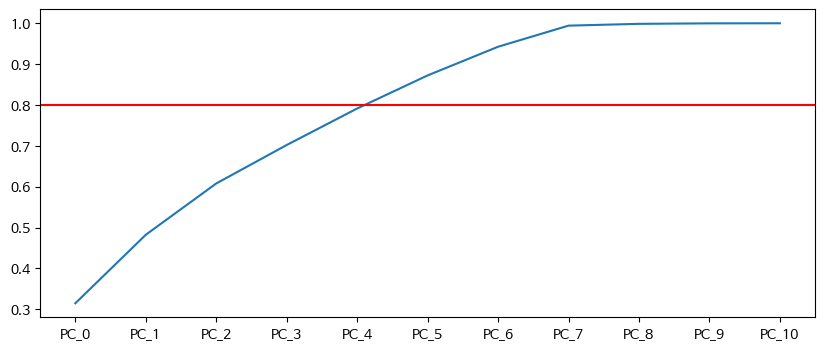

In [10]:
# pca
# ÎçîÎØ∏ÌôîÎêú 0/1 Î≥ÄÏàòÎäî Î∂ÑÏÇ∞Ïù¥ ÏûëÍ∏∞ ÎïåÎ¨∏Ïóê PCAÏóêÏÑú Í∏∞Ïó¨ÎèÑÍ∞Ä Îß§Ïö∞ ÎÇÆÏùÑ Ïàò ÏûàÏùå > Ïà´ÏûêÌòïÎßå PCAÏßÑÌñâ

# PCAÎ•º ÌïòÍ∏∞ ÏúÑÌï¥ Scaling ÏßÑÌñâ - ÌèâÍ∑† 0 / ÌëúÏ§ÄÌé∏Ï∞® 1Î°ú Ï†ïÍ∑úÌôî
# Ïä§ÏºÄÏùºÎßÅ Ïù¥Ïú† : Îã®ÏúÑÏùò Ï∞®Ïù¥Í∞Ä Ïª§ÏßÄÎ©¥, ÏßÄÎÇòÏπòÍ≤å ÎÜíÏùÄ Î∂ÑÏÇ∞ÏùÑ Í∞ÄÏßÄÍ≤å Îê®


scaled_numeric_df = pd.DataFrame(StandardScaler().fit_transform(numeric_df), columns = numeric_df.columns)

pca = PCA()
pca.fit(scaled_numeric_df)

pca_result = pd.DataFrame({
      'ratio' : pca.explained_variance_ratio_,
      'cumsum' : pca.explained_variance_ratio_.cumsum()

  })

pca_result.index = ['PC_' + str(x) for x in range(len(pca_result.index))]

display(pca_result.T)

f, ax = plt.subplots(figsize = (10, 4))
plt.plot(pca_result.index, pca_result['cumsum'])
plt.axhline(0.8, color = 'red')

print("""
PCA Î∂ÑÏÑù Í≤∞Í≥º, Ï†ÑÏ≤¥ 11Í∞úÏùò Ï£ºÏÑ±Î∂Ñ Ï§ë ÏÉÅÏúÑ 6Í∞úÏùò Ï£ºÏÑ±Î∂ÑÎßåÏúºÎ°ú Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÇ∞Ïùò ÏïΩ 87%Î•º ÏÑ§Î™ÖÌï† Ïàò ÏûàÏóàÎã§.
Ïù¥Îäî ÏùºÎ∞òÏ†ÅÏúºÎ°ú ÏÇ¨Ïö©ÎêòÎäî Ï∞®Ïõê Ï∂ïÏÜå Í∏∞Ï§Ä(ÎàÑÏ†Å ÏÑ§Î™ÖÎ†• 80~90%)ÏùÑ ÎßåÏ°±ÌïòÎØÄÎ°ú,
Ï†ïÎ≥¥ ÏÜêÏã§ ÏóÜÏù¥ Ï∞®ÏõêÏùÑ ÏïΩ Ï†àÎ∞òÏúºÎ°ú Ï∂ïÏÜåÌï† Ïàò ÏûàÎäî Í∑ºÍ±∞Í∞Ä ÎêúÎã§.

Îî∞ÎùºÏÑú, Î≥∏ Îç∞Ïù¥ÌÑ∞Îäî Ï∞®Ïõê Ï∂ïÏÜåÎ•º ÌÜµÌï¥ Î≥ÄÏàò ÏàòÎ•º Ï§ÑÏù¥Îêò,
ÌïµÏã¨ Ï†ïÎ≥¥Îäî ÎåÄÎ∂ÄÎ∂Ñ Ïú†ÏßÄÌï† Ïàò ÏûàÏñ¥ Ï∞®Ïõê Ï∂ïÏÜåÏùò Ï†ÅÏö©Ïù¥ ÌÉÄÎãπÌïòÍ≥† Í∂åÏû•ÎêúÎã§.

""")

In [11]:
## ÏàòÏπòÌòï Î≥ÄÏàòÎì§ÏùÑ 6Í∞úÎ°ú Ï∞®Ïõê Ï∂ïÏÜåÌïú Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ pca6_df Î°ú Ï†ÄÏû•
pca = PCA(n_components= 6)
pca6_result = pca.fit_transform(scaled_numeric_df)

pca6_df= pd.DataFrame(pca6_result, columns = ['PC_' + str(x) for x in range(1,7)])


###### ‚úÖ 3-1 Ïû¨Í≥ÑÏïΩ ÌöüÏàò Ïù¥Î∂ÑÎ≥ÄÏàòÎ•º Í∏∞Ï§ÄÏúºÎ°ú ÏÑ∏Í∑∏Î®ºÌä∏Î•º Íµ¨Î∂ÑÌïòÍ≥† Í∞Å ÏÑ∏Í∑∏Î®ºÌä∏Ïùò ÌäπÏßïÏùÑ Î∂ÑÏÑù

In [12]:
df5 = df4.drop(columns = ['ÏûÖÏ£ºÏó∞ÎèÑ','Í±∞Ï£ºÏó∞ÎèÑ'])

seg = []
for col in df5.columns[:-1] :
  if df5[col].dtype == 'object' :
    cross_tab = pd.crosstab(df5[col], df5['Ïû¨Í≥ÑÏïΩ_Ïù¥Î∂ÑÎ≥ÄÏàò'])
    stat, p_val , dof, expectd = chi2_contingency(cross_tab)

  else :
    g1 = df5[df5['Ïû¨Í≥ÑÏïΩ_Ïù¥Î∂ÑÎ≥ÄÏàò'] == 'ÎÜíÏùå'][col]
    g2 = df5[df5['Ïû¨Í≥ÑÏïΩ_Ïù¥Î∂ÑÎ≥ÄÏàò'] == 'ÎÇÆÏùå'][col]

    stat, p_val = ttest_ind(g1, g2)

  seg.append([col, p_val])

seg_stat  = pd.DataFrame(seg, columns = ['variable','p_val'])
seg_stat['check'] = seg_stat['p_val'].apply(lambda x : 'Ïú†Ïùò' if x < 0.5 else 'Ïú†ÏùòÌïòÏßÄ ÏïäÏùå')
display(seg_stat)

print("""
Ïù¥Î∂Ñ Î≥ÄÏàòÏùò ÏÑ∏Í∑∏ Î∂ÑÏÑùÏùÑ ÏúÑÌï¥ÏÑú Î≤îÏ£ºÌòï Î≥ÄÏàòÏôÄÎäî Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ïÏùÑ ÌÜµÌï¥, ÎèÖÎ¶ΩÏÑ±ÏùÑ ÌôïÏù∏ÌïúÎã§.
ÏàòÏπòÌòï Î≥ÄÏàòÏôÄÎäî ÎÜíÏùå/ÎÇÆÏùåÏóê Îî∞Î•∏ ÌèâÍ∑† Í≤ÄÏ†ïÏùÑ ÌÜµÌï¥ Í≤ÄÏ†ïÌïú Í≤∞Í≥º ÏõîÏÑ∏, Î≥¥Ï¶ùÍ∏à, ÎÇòÏù¥ Îì±ÏùÄ Îëê Í∑∏Î£πÍ∞Ñ ÌèâÍ∑† Ï∞®Ïù¥Í∞Ä Ïú†ÏùòÌïòÎ©∞,
Ìï¥Îãπ Î≥ÄÏàòÎì§ÏùÄ Ïû¨Í≥ÑÏïΩ Í≤∞Í≥ºÏóê ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäî Ï£ºÏöîÌïú ÏöîÏù∏Ïù¥ÎùºÍ≥† Ìï¥ÏÑù Îê† Ïàò ÏûàÎã§.
"Ï∏µ" Î≥ÄÏàòÎäî Ïû¨Í≥ÑÏïΩÍ≥º Ïú†ÏùòÌïòÏßÄ ÏïäÏùÄ Í≤ÉÏúºÎ°ú Î≥¥Ïó¨, Ï∏µÏàòÏóê Îî∞Î•∏ Ïû¨Í≥ÑÏïΩÏóê ÎåÄÌïú ÏòÅÌñ•Î†•ÏùÄ ÎØ∏ÎØ∏Ìïú Í≤ÉÏúºÎ°ú ÌåêÎã®ÎêúÎã§.
""")

variable          p_val    check
0      Í≥ÑÏïΩÍµ¨Î∂Ñ  2.316302e-130       Ïú†Ïùò
1     Ïû¨Í≥ÑÏïΩÌöüÏàò   0.000000e+00       Ïú†Ïùò
2      Í±∞Ï£ºÍ∞úÏõî   0.000000e+00       Ïú†Ïùò
3    ÏïÑÌååÌä∏ ÌèâÏ†ê   1.929711e-07       Ïú†Ïùò
4         Ï∏µ   8.517383e-01  Ïú†ÏùòÌïòÏßÄ ÏïäÏùå
5       ÌèâÌòïÎåÄ   1.693525e-09       Ïú†Ïùò
6     ÏõîÏÑ∏(Ïõê)  5.432890e-286       Ïú†Ïùò
7    Î≥¥Ï¶ùÍ∏à(Ïõê)  7.951183e-303       Ïú†Ïùò
8        ÎÇòÏù¥  1.297889e-141       Ïú†Ïùò
9        ÏÑ±Î≥Ñ   8.297464e-16       Ïú†Ïùò
10     Í≤∞ÌòºÏó¨Î∂Ä   5.637443e-15       Ïú†Ïùò
11    Í±∞Ï£ºÏûê Ïàò   8.886125e-09       Ïú†Ïùò
12     Ìá¥Í±∞Ïó¨Î∂Ä  2.316302e-130       Ïú†Ïùò


Ïù¥Î∂Ñ Î≥ÄÏàòÏùò ÏÑ∏Í∑∏ Î∂ÑÏÑùÏùÑ ÏúÑÌï¥ÏÑú Î≤îÏ£ºÌòï Î≥ÄÏàòÏôÄÎäî Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ïÏùÑ ÌÜµÌï¥, ÎèÖÎ¶ΩÏÑ±ÏùÑ ÌôïÏù∏ÌïúÎã§.
ÏàòÏπòÌòï Î≥ÄÏàòÏôÄÎäî ÎÜíÏùå/ÎÇÆÏùåÏóê Îî∞Î•∏ ÌèâÍ∑† Í≤ÄÏ†ïÏùÑ ÌÜµÌï¥ Í≤ÄÏ†ïÌïú Í≤∞Í≥º ÏõîÏÑ∏, Î≥¥Ï¶ùÍ∏à, ÎÇòÏù¥ Îì±ÏùÄ Îëê Í∑∏Î£πÍ∞Ñ ÌèâÍ∑† Ï∞®Ïù¥Í∞Ä Ïú†ÏùòÌïòÎ©∞,
Ìï¥Îãπ Î≥ÄÏàòÎì§ÏùÄ Ïû¨Í≥ÑÏïΩ Í≤∞Í≥ºÏóê ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäî Ï£ºÏöîÌïú ÏöîÏù∏Ïù¥ÎùºÍ≥† Ìï¥ÏÑù Îê† Ïàò ÏûàÎã§.
"Ï∏µ" Î≥ÄÏàòÎäî Ïû¨Í≥ÑÏïΩÍ≥º Ïú†ÏùòÌïòÏßÄ ÏïäÏùÄ Í≤ÉÏúºÎ°ú Î≥¥Ïó¨, Ï∏µÏàòÏóê Îî∞Î•∏ Ïû¨Í≥ÑÏïΩÏóê ÎåÄÌïú ÏòÅÌñ•Î†•ÏùÄ ÎØ∏ÎØ∏Ìïú Í≤ÉÏúºÎ°ú ÌåêÎã®ÎêúÎã§.



###### ‚úÖ 3-2 Ïû¨Í≥ÑÏïΩÌöüÏàò Î≥ÄÏàòÎ•º Ï¢ÖÏÜçÎ≥ÄÏàòÎ°ú ÌïòÎäî ÌöåÍ∑Ä Î∂ÑÏÑùÏùÑ Îëê Í∞ÄÏßÄ Ïù¥ÏÉÅÏùò Î∞©Î≤ïÎ°†ÏùÑ ÌÜµÌï¥ ÏàòÌñâÌïòÍ≥† ÏµúÏ¢Ö Î™®Îç∏ÏùÑ Í≤∞Ï†ïÌïòÏãúÏò§. Ïû¨Í≥ÑÏïΩÌöüÏàò Ïù¥Î∂ÑÎ≥ÄÏàòÎ•º Ï¢ÖÏÜçÎ≥ÄÏàòÎ°ú ÌïòÎäî Î∂ÑÎ•ò Î∂ÑÏÑùÏùÑ ÎëêÍ∞ÄÏßÄ Ïù¥ÏÉÅÏùò Î∞©Î≤ïÎ°†ÏùÑ ÌÜµÌï¥ ÏàòÌñâÌïòÍ≥† ÏµúÏ¢Ö Î™®Îç∏ÏùÑ Í≤∞Ï†ï

In [13]:
numeric_df.head()

# Ïû¨Í≥ÑÏïΩ ÌöüÏàò - ÌöåÍ∑ÄÎ∂ÑÏÑù
y = numeric_df['Ïû¨Í≥ÑÏïΩÌöüÏàò']

# Numeriic Î≥ÄÏàò - scaling
scale_x = pd.DataFrame(StandardScaler().fit_transform(numeric_df.drop(columns =['Ïû¨Í≥ÑÏïΩÌöüÏàò'])), columns = numeric_df.drop(columns =['Ïû¨Í≥ÑÏïΩÌöüÏàò']).columns)

#  Î≤îÏ£ºÌòï Ï§ÄÎπÑ
dummies_df = pd.get_dummies(df4[df4.select_dtypes(include = 'object').columns[:-1]] , dtype =int)

X = pd.concat([scale_x , dummies_df] , axis = 1)


# Model
rf = RandomForestRegressor()
lr = LinearRegression()

def eval_models(model, name) :
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 31)
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  r2 = r2_score(y_test, pred)
  mse = np.sqrt(mean_squared_error(y_test, pred))

  return r2,  mse

result = []
linear_lst = []
for model , name in [[rf ,'RandomForeset'], [lr , 'LinearRegression']] :
  mse, r2 = eval_models(model, name)
  result.append([name, mse, r2])

  linear_lst.append(model)

print(pd.DataFrame(result, columns = ['Model','MSE','R2']))

print("""
'Ïû¨Í≥ÑÏïΩÌöüÏàò'Î•º Ï¢ÖÏÜçÎ≥ÄÏàòÎ°ú ÌïòÏó¨ ÌöåÍ∑Ä Î∂ÑÏÑùÏùÑ ÏàòÌñâÌïòÏòÄÏúºÎ©∞,
Î™®Îç∏Ïùò ÏòàÏ∏° ÏÑ±Îä•Í≥º Ìï¥ÏÑù Í∞ÄÎä•ÏÑ±ÏùÑ Ï¢ÖÌï©Ï†ÅÏúºÎ°ú Í≥†Î†§ÌïòÍ∏∞ ÏúÑÌï¥
`ÏÑ†ÌòïÌöåÍ∑ÄÎ™®Îç∏(Linear Regression)`Í≥º `ÎûúÎç§Ìè¨Î†àÏä§Ìä∏ ÌöåÍ∑ÄÎ™®Îç∏(Random Forest Regressor)`Ïùò Îëê Í∞ÄÏßÄ Î∞©Î≤ïÎ°†ÏùÑ ÎπÑÍµêÌïòÏòÄÎã§.

#### 1. Linear Regression
- Í∞ÄÏû• Í∏∞Î≥∏Ï†ÅÏù¥Í≥† ÏßÅÍ¥ÄÏ†ÅÏù∏ ÌöåÍ∑ÄÎ™®Îç∏Î°ú, ÎèÖÎ¶ΩÎ≥ÄÏàòÏôÄ Ï¢ÖÏÜçÎ≥ÄÏàò Í∞ÑÏùò ÏÑ†Ìòï Í¥ÄÍ≥ÑÎ•º Í∞ÄÏ†ïÌïúÎã§.
- Î≥ÄÏàòÏùò ÏòÅÌñ•Î†•ÏùÑ Í≥ÑÏàòÎ°ú Ìï¥ÏÑùÌï† Ïàò ÏûàÏñ¥ ÏÑ§Î™ÖÎ†•Í≥º Ìï¥ÏÑùÏù¥ Ïö∞ÏàòÌïòÎ©∞,
- Îã§Ï§ëÍ≥µÏÑ†ÏÑ±Ïù¥ÎÇò ÏÑ†ÌòïÏÑ± Í∞ÄÏ†ïÏùò Ï†ÅÌï© Ïó¨Î∂ÄÎ•º ÌôïÏù∏ÌïòÎäî Í∏∞Ï§ÄÏ†êÏúºÎ°ú ÌôúÏö©Ìï† Ïàò ÏûàÎã§.

#### 2. Random Forest Regressor
- ÎπÑÏÑ†ÌòïÏÑ±Í≥º ÏÉÅÌò∏ÏûëÏö©Ïù¥ Ï°¥Ïû¨Ìï† Ïàò ÏûàÎäî ÌòÑÏã§Ï†ÅÏù∏ Îç∞Ïù¥ÌÑ∞Ïùò Î≥µÏû°ÏÑ±ÏùÑ Î∞òÏòÅÌïòÍ∏∞ ÏúÑÌï¥,
  **ÏïôÏÉÅÎ∏î Í∏∞Î∞òÏùò ÎπÑÏÑ†Ìòï Î™®Îç∏Ïù∏ ÎûúÎç§Ìè¨Î†àÏä§Ìä∏**Î•º Ìï®Íªò Ï†ÅÏö©ÌïòÏòÄÎã§.
- Î≥ÄÏàò Í∞Ñ ÏÉÅÌò∏ÏûëÏö©, ÎπÑÏÑ†Ìòï Í¥ÄÍ≥Ñ, Ïù¥ÏÉÅÏπòÏóê Í∞ïÏù∏Ìïú ÌäπÏÑ±ÏùÑ Í∞ÄÏßÄÍ≥† ÏûàÏñ¥ ÏòàÏ∏° Ï†ïÌôïÎèÑ Ï∏°Î©¥ÏóêÏÑú Í∞ïÎ†•Ìïú ÏÑ±Îä•ÏùÑ Í∏∞ÎåÄÌï† Ïàò ÏûàÎã§.
- ÎòêÌïú, Î≥ÄÏàò Ï§ëÏöîÎèÑ(feature importance)Î•º ÌÜµÌï¥ Ï£ºÏöî ÏòÅÌñ• ÏöîÏù∏ÏùÑ ÏãúÍ∞ÅÌôîÌï† Ïàò ÏûàÎã§Îäî Ïû•Ï†êÏù¥ ÏûàÎã§.

Ïù¥Îü¨Ìïú Îëê Î™®Îç∏ÏùÑ ÌÜµÌï¥, ÌïòÎÇòÎäî Ìï¥ÏÑù Ï§ëÏã¨(Linear Regression), Îã§Î•∏ ÌïòÎÇòÎäî **ÏòàÏ∏° ÏÑ±Îä• Ï§ëÏã¨(Random Forest)**Ïùò Í¥ÄÏ†êÏóêÏÑú
Î∂ÑÏÑù Í≤∞Í≥ºÎ•º ÎπÑÍµêÌïòÍ≥†, Îç∞Ïù¥ÌÑ∞Ïóê Ï†ÅÌï©Ìïú ÌöåÍ∑Ä Î∞©Î≤ïÎ°†ÏùÑ ÌåêÎã®ÌïòÍ≥†Ïûê ÌïòÏòÄÎã§.

""")

              Model       MSE        R2
0     RandomForeset  0.955303  0.674162
1  LinearRegression  0.940966  0.774779

'Ïû¨Í≥ÑÏïΩÌöüÏàò'Î•º Ï¢ÖÏÜçÎ≥ÄÏàòÎ°ú ÌïòÏó¨ ÌöåÍ∑Ä Î∂ÑÏÑùÏùÑ ÏàòÌñâÌïòÏòÄÏúºÎ©∞,
Î™®Îç∏Ïùò ÏòàÏ∏° ÏÑ±Îä•Í≥º Ìï¥ÏÑù Í∞ÄÎä•ÏÑ±ÏùÑ Ï¢ÖÌï©Ï†ÅÏúºÎ°ú Í≥†Î†§ÌïòÍ∏∞ ÏúÑÌï¥
`ÏÑ†ÌòïÌöåÍ∑ÄÎ™®Îç∏(Linear Regression)`Í≥º `ÎûúÎç§Ìè¨Î†àÏä§Ìä∏ ÌöåÍ∑ÄÎ™®Îç∏(Random Forest Regressor)`Ïùò Îëê Í∞ÄÏßÄ Î∞©Î≤ïÎ°†ÏùÑ ÎπÑÍµêÌïòÏòÄÎã§.

#### 1. Linear Regression
- Í∞ÄÏû• Í∏∞Î≥∏Ï†ÅÏù¥Í≥† ÏßÅÍ¥ÄÏ†ÅÏù∏ ÌöåÍ∑ÄÎ™®Îç∏Î°ú, ÎèÖÎ¶ΩÎ≥ÄÏàòÏôÄ Ï¢ÖÏÜçÎ≥ÄÏàò Í∞ÑÏùò ÏÑ†Ìòï Í¥ÄÍ≥ÑÎ•º Í∞ÄÏ†ïÌïúÎã§.
- Î≥ÄÏàòÏùò ÏòÅÌñ•Î†•ÏùÑ Í≥ÑÏàòÎ°ú Ìï¥ÏÑùÌï† Ïàò ÏûàÏñ¥ ÏÑ§Î™ÖÎ†•Í≥º Ìï¥ÏÑùÏù¥ Ïö∞ÏàòÌïòÎ©∞,
- Îã§Ï§ëÍ≥µÏÑ†ÏÑ±Ïù¥ÎÇò ÏÑ†ÌòïÏÑ± Í∞ÄÏ†ïÏùò Ï†ÅÌï© Ïó¨Î∂ÄÎ•º ÌôïÏù∏ÌïòÎäî Í∏∞Ï§ÄÏ†êÏúºÎ°ú ÌôúÏö©Ìï† Ïàò ÏûàÎã§.

#### 2. Random Forest Regressor
- ÎπÑÏÑ†ÌòïÏÑ±Í≥º ÏÉÅÌò∏ÏûëÏö©Ïù¥ Ï°¥Ïû¨Ìï† Ïàò ÏûàÎäî ÌòÑÏã§Ï†ÅÏù∏ Îç∞Ïù¥ÌÑ∞Ïùò Î≥µÏû°ÏÑ±ÏùÑ Î∞òÏòÅÌïòÍ∏∞ ÏúÑÌï¥,
  **ÏïôÏÉÅÎ∏î Í∏∞Î∞òÏùò ÎπÑÏÑ†Ìòï Î™®Îç∏Ïù∏ ÎûúÎç§Ìè¨Î†àÏä§Ìä∏**Î•º

In [14]:
# Ïû¨Í≥ÑÏïΩÌöüÏàò Ïù¥Î∂ÑÎ≥ÄÏàòÎ•º Ï¢ÖÏÜçÎ≥ÄÏàò - Î∂ÑÎ•ò Î∂ÑÏÑù

y = df4['Ïû¨Í≥ÑÏïΩ_Ïù¥Î∂ÑÎ≥ÄÏàò'].map({'ÎÜíÏùå': 1, 'ÎÇÆÏùå' : 0})
X = pd.concat([scaled_numeric_df , dummies_df] , axis = 1)

# Model
rf_cla = RandomForestClassifier(random_state = 42)
lr_cla = LogisticRegression()

def eval_models(model, name) :
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 31)
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  f1 = f1_score(y_test, pred)
  acc = accuracy_score(y_test, pred)

  return r2,  mse

result = []
model_lst = []
for model , name in [[rf_cla ,'RandomForeset'], [lr_cla , 'LogisticRegression']] :
  f1, acc = eval_models(model, name)
  # Î™®Îç∏Î≥Ñ Í≤∞Í≥º
  result.append([name, f1, acc])
  # ÏÇ¨Ïö©Îêú Î™®Îç∏ÏùÑ Î¶¨Ïä§Ìä∏Ïóê Îã¥Ïùå > Î≥ÄÏàò Ï§ëÏöîÎèÑ Îïå ÎÅåÏñ¥Îã§ÏîÄ
  model_lst.append(model)

print(pd.DataFrame(result, columns = ['Model','F1_score','Accuracy_Score']))
print("""
Ï†ÅÌï©Ìïú Îëê Í∞ÄÏßÄ Î®∏Ïã†Îü¨Îãù Î™®Îç∏Ïù∏ `Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä(Logistic Regression)`ÏôÄ `ÎûúÎç§Ìè¨Î†àÏä§Ìä∏ Î∂ÑÎ•òÍ∏∞(Random Forest Classifier)`Î•º Ï†ÅÏö©ÌïòÏòÄÎã§.
Í∞Å Î™®Îç∏ÏùÄ ÏòàÏ∏° Ï†ïÌôïÎèÑÏôÄ Ìï¥ÏÑù Í∞ÄÎä•ÏÑ±Ïùò Í∑†ÌòïÏùÑ Í≥†Î†§ÌïòÏó¨ ÏÑ†ÌÉùÎêòÏóàÎã§.

#### 1. Logistic Regression
- Î°úÏßÄÏä§Ìã± ÌöåÍ∑ÄÎäî Î≤îÏ£ºÌòï Ï¢ÖÏÜçÎ≥ÄÏàòÏóê Í∞ÄÏû• Í∏∞Î≥∏Ï†ÅÏúºÎ°ú Ï†ÅÏö©ÎêòÎäî ÏÑ†Ìòï Î™®Îç∏Î°ú,
  ÏòàÏ∏° Í≤∞Í≥ºÏóê ÎåÄÌïú **ÌôïÎ•† Í∏∞Î∞òÏùò Ìï¥ÏÑù**Ïù¥ Í∞ÄÎä•ÌïòÎã§Îäî Ïû•Ï†êÏù¥ ÏûàÎã§.
- ÎòêÌïú Î™®Îç∏ Í≥ÑÏàòÎ•º ÌÜµÌï¥ Í∞Å ÎèÖÎ¶ΩÎ≥ÄÏàòÍ∞Ä Ïû¨Í≥ÑÏïΩ Ïó¨Î∂ÄÏóê ÎØ∏ÏπòÎäî ÏòÅÌñ•ÏùÑ **Ï†ïÎüâÏ†ÅÏúºÎ°ú Ìï¥ÏÑù**Ìï† Ïàò ÏûàÏúºÎ©∞,
- Îã§Ï§ëÍ≥µÏÑ†ÏÑ±Ïù¥ÎÇò Î≥ÄÏàò Í∞Ñ Í¥ÄÍ≥ÑÏùò Îã®ÏàúÏÑ±ÏùÑ ÌèâÍ∞ÄÌïòÎäî **Í∏∞Ï§ÄÏÑ† Î™®Îç∏**Î°ú Ï†ÅÌï©ÌïòÎã§.

#### 2. Random Forest Classifier
- ÎûúÎç§Ìè¨Î†àÏä§Ìä∏Îäî Í≤∞Ï†ïÌä∏Î¶¨Î•º Í∏∞Î∞òÏúºÎ°ú ÌïòÎäî **ÏïôÏÉÅÎ∏î Î™®Îç∏Î°ú**,
  Î≥ÄÏàò Í∞Ñ **ÎπÑÏÑ†Ìòï Í¥ÄÍ≥Ñ Î∞è ÏÉÅÌò∏ÏûëÏö©ÏùÑ Ìö®Í≥ºÏ†ÅÏúºÎ°ú Î∞òÏòÅ**ÌïòÏó¨ ÎÜíÏùÄ ÏòàÏ∏° ÏÑ±Îä•ÏùÑ Î≥¥Ïû•ÌïúÎã§.
- Í≥ºÏ†ÅÌï©Ïóê Í∞ïÏù∏ÌïòÎ©∞, Î≥ÄÏàò Ï§ëÏöîÎèÑ(feature importance)Î•º ÌÜµÌï¥ Ï£ºÏöî ÏòÅÌñ•ÏùÑ Ï£ºÎäî Î≥ÄÏàòÎì§ÏùÑ ÌååÏïÖÌï† Ïàò ÏûàÏñ¥
  **ÏÑ§Î™ÖÎ†•Í≥º ÏÑ±Îä•ÏùÑ ÎèôÏãúÏóê Ï∂îÍµ¨ÌïòÎäî Î∂ÑÏÑù Î™©Ï†Å**Ïóê Ï†ÅÌï©ÌïòÎã§.
- ÌäπÌûà Î≤îÏ£ºÌòï Î≥ÄÏàòÏôÄ ÏàòÏπòÌòï Î≥ÄÏàòÍ∞Ä ÌòºÌï©Îêú Íµ¨Ï°∞ÏóêÏÑúÎèÑ ÏÑ±Îä• Ï†ÄÌïò ÏóÜÏù¥ Ïú†Ïó∞ÌïòÍ≤å ÎåÄÏùë Í∞ÄÎä•ÌïòÎã§.

Ïù¥Îü¨Ìïú Îëê Î™®Îç∏ÏùÑ Ï†ÅÏö©ÌïòÏó¨ `F1-score`ÏôÄ `Accuracy`Î•º ÎπÑÍµêÌï®ÏúºÎ°úÏç®,
ÌïòÎÇòÎäî **ÏÑ†Ìòï Í∏∞Î∞òÏùò Ìï¥ÏÑù Í∞ÄÎä•Ìïú Î™®Îç∏(Logistic Regression)**,
Îã§Î•∏ ÌïòÎÇòÎäî **Í≥†ÏÑ±Îä• ÎπÑÏÑ†Ìòï Î™®Îç∏(Random Forest)**Î°úÏÑú
ÏÑúÎ°ú Îã§Î•∏ Î∂ÑÏÑùÏ†Å Í¥ÄÏ†êÏùÑ ÎπÑÍµêÌïòÍ≥†, Îç∞Ïù¥ÌÑ∞ ÌäπÏÑ±Ïóê Í∞ÄÏû• Ï†ÅÌï©Ìïú Î∂ÑÎ•ò Ï†ÑÎûµÏùÑ Í≤∞Ï†ïÌïòÍ≥†Ïûê ÌïòÏòÄÎã§.

""")

                Model  F1_score  Accuracy_Score
0       RandomForeset  0.774779        0.940966
1  LogisticRegression  0.774779        0.940966

Ï†ÅÌï©Ìïú Îëê Í∞ÄÏßÄ Î®∏Ïã†Îü¨Îãù Î™®Îç∏Ïù∏ `Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä(Logistic Regression)`ÏôÄ `ÎûúÎç§Ìè¨Î†àÏä§Ìä∏ Î∂ÑÎ•òÍ∏∞(Random Forest Classifier)`Î•º Ï†ÅÏö©ÌïòÏòÄÎã§.
Í∞Å Î™®Îç∏ÏùÄ ÏòàÏ∏° Ï†ïÌôïÎèÑÏôÄ Ìï¥ÏÑù Í∞ÄÎä•ÏÑ±Ïùò Í∑†ÌòïÏùÑ Í≥†Î†§ÌïòÏó¨ ÏÑ†ÌÉùÎêòÏóàÎã§.

#### 1. Logistic Regression
- Î°úÏßÄÏä§Ìã± ÌöåÍ∑ÄÎäî Î≤îÏ£ºÌòï Ï¢ÖÏÜçÎ≥ÄÏàòÏóê Í∞ÄÏû• Í∏∞Î≥∏Ï†ÅÏúºÎ°ú Ï†ÅÏö©ÎêòÎäî ÏÑ†Ìòï Î™®Îç∏Î°ú,
  ÏòàÏ∏° Í≤∞Í≥ºÏóê ÎåÄÌïú **ÌôïÎ•† Í∏∞Î∞òÏùò Ìï¥ÏÑù**Ïù¥ Í∞ÄÎä•ÌïòÎã§Îäî Ïû•Ï†êÏù¥ ÏûàÎã§.
- ÎòêÌïú Î™®Îç∏ Í≥ÑÏàòÎ•º ÌÜµÌï¥ Í∞Å ÎèÖÎ¶ΩÎ≥ÄÏàòÍ∞Ä Ïû¨Í≥ÑÏïΩ Ïó¨Î∂ÄÏóê ÎØ∏ÏπòÎäî ÏòÅÌñ•ÏùÑ **Ï†ïÎüâÏ†ÅÏúºÎ°ú Ìï¥ÏÑù**Ìï† Ïàò ÏûàÏúºÎ©∞,
- Îã§Ï§ëÍ≥µÏÑ†ÏÑ±Ïù¥ÎÇò Î≥ÄÏàò Í∞Ñ Í¥ÄÍ≥ÑÏùò Îã®ÏàúÏÑ±ÏùÑ ÌèâÍ∞ÄÌïòÎäî **Í∏∞Ï§ÄÏÑ† Î™®Îç∏**Î°ú Ï†ÅÌï©ÌïòÎã§.

#### 2. Random Forest Classifier
- ÎûúÎç§Ìè¨Î†àÏä§Ìä∏Îäî Í≤∞Ï†ïÌä∏Î¶¨Î•º Í∏∞Î∞òÏúºÎ°ú ÌïòÎäî **ÏïôÏÉÅÎ∏î Î™®Îç∏Î°ú**,
  Î

###### ‚úÖ 3-3 ÏµúÏ¢Ö Ï±ÑÌÉùÌïú Î™®Îç∏ÏóêÏÑú Í∞ÅÍ∞Å Ïú†ÏùòÌïòÍ≤å ÏûëÏö©ÌïòÎäî Î≥ÄÏàòÎ•º ÌôïÏù∏ ÌïòÍ≥† ÏÑ§Î™Ö

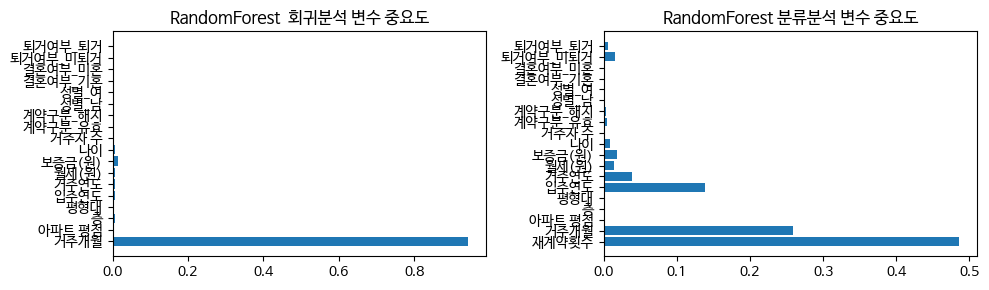

In [15]:
#model_lst[0]
#linear_lst[0]

fig, ax = plt.subplots(1,2, figsize=  (10,3))

# ÌöåÍ∑Ä
ax[0].barh(linear_lst[0].feature_names_in_ , linear_lst[0].feature_importances_)
ax[0].set_title('RandomForest  ÌöåÍ∑ÄÎ∂ÑÏÑù Î≥ÄÏàò Ï§ëÏöîÎèÑ')
# Î∂ÑÎ•ò
ax[1].barh(model_lst[0].feature_names_in_ , model_lst[0].feature_importances_)
ax[1].set_title('RandomForest Î∂ÑÎ•òÎ∂ÑÏÑù Î≥ÄÏàò Ï§ëÏöîÎèÑ')

fig.tight_layout()
plt.show()

###### ‚úÖ 4-1 Í∞Å ÌöåÏ∞®Î≥ÑÎ°ú 1Î≤à ÌÉÄÏûêÏùò Ï∂úÎ£® (1,2,3Î£®ÌÉÄÏôÄ ÏÇ¨ÏÇ¨Íµ¨(Î≥ºÎÑ∑, Î™∏ÏóêÎßûÎäîÍ≥µ))Í∞Ä ÏûàÎäî Í≤ΩÏö∞Ïóê ÎåÄÌï¥ ÎìùÏ†êÏù¥ Î∞úÏÉù ÌñàÎäîÏßÄ ÌôïÏù∏ÌïòÍ≥†Ïûê ÌïúÎã§. Ïù¥Î•º ÏúÑÌïú Ï†ÑÏ≤òÎ¶¨Î•º ÏàòÌñâÌïòÎùº. (Îã®, Ï≤´ Î≤àÏß∏ ÌòπÏùÄ Îëê Î≤àÏß∏ ÌÉÄÏûêÍ∞Ä ÌôàÎü∞ÏùÑ Ïπú Í≤ΩÏö∞ Ìï¥Îãπ ÌöåÏ∞® Îç∞Ïù¥ÌÑ∞Îäî Ï†úÏô∏ÌïúÎã§.)

      1. Ï≤´ÌÉÄÏûêÏôÄ ÎëòÏß∏ÌÉÄÏûêÏùò Í∞Å Ïù¥ÎãùÎ≥Ñ Ï∂úÎ£®ÌòÑÌô©, Ìï¥Îãπ Ïù¥ÎãùÏùò ÎìùÏ†êÏàòÎ•º 3columnsÏùò Îç∞Ïù¥ÌÑ∞Î°ú Î≥ÄÌôò
      2. Ï†ïÏàòÌòï Í∞íÏù¥ ÏïÑÎãå Îç∞Ïù¥ÌÑ∞ ÌñâÎ•º Ï†úÍ±∞
      3. ÌôàÎü∞ (4)Í∞íÏùÑ Í∞ÄÏßÄÎäî ÌñâÏùÑ Ï†úÍ±∞
      4. Ïù¥ÎãùÎ≥Ñ Ï†êÏàòÎ•º binaryÎ°ú Î≥ÄÌôò (ÎìùÏ†ê ÏûàÏúºÎ©¥ 1 ,ÏóÜÏúºÎ©¥ 0 )
      5. ÎëòÏß∏ ÌÉÄÏûê Ï∂úÎ£® Í≤∞Í≥ºÎ•º one-hot encoding

In [18]:

df =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/29/p2_.csv')

df.head(3)

game_id a1_1  a1_2 a2_1  a2_2  a3_1  a3_2 a4_1  a4_2  a5_1  a5_2  a6_1  \
0  201900016    5     5    5     5     5     5    5     5     5     5     7   
1  201900023    6     4    5     5     2     5    1     1     6     5     4   
2  201900103    5     6    5     5     1     9    5     4     6     1     4   

   a6_2 a7_1  a7_2  a8_1  a8_2  a9_1  a9_2  b1  b2  b3  b4  b5  b6  b7  b8  b9  
0     1    5     5     1     1     1     5   0   0   0   0   0   0   0   4   2  
1     1    1     5     5     6     2     7   3   0   0   1   0   1   3   1   0  
2     2    6     1     5     5     5     6   0   0   1   1   4   1   2   0   1

In [81]:
# Ìï¥Îãπ Ïù¥ÎãùÏùò ÎìùÏ†êÏàòÎ•º 3columnsÏùò Îç∞Ïù¥ÌÑ∞Î°ú Î≥ÄÌôò
lst = []

for i in range(1, 10) :
  x = df[['game_id' ,f'a{i}_1' , f'a{i}_2', f'b{i}' ]]
  x['innings'] = i
  x.columns = ['game_id', 'a_1', 'a_2', 'score', 'innings']
  lst.append(x)

df2 = pd.concat(lst, axis = 0).reset_index(drop = True)

# Ï†ïÏàòÌòï Í∞íÏù¥ ÏïÑÎãå Îç∞Ïù¥ÌÑ∞ ÌñâÎ•º Ï†úÍ±∞
df3 = df2[df2['a_1'].apply(lambda x : str(x).isdigit())]


# 3. ÌôàÎü∞ (4)Í∞íÏùÑ Í∞ÄÏßÄÎäî ÌñâÏùÑ Ï†úÍ±∞
df4 = df3.loc[(df3['a_1'] != 4)  & (df3['a_2'] != 4)]

#  4. Ïù¥ÎãùÎ≥Ñ Ï†êÏàòÎ•º binaryÎ°ú Î≥ÄÌôò (ÎìùÏ†ê ÏûàÏúºÎ©¥ 1 ,ÏóÜÏúºÎ©¥ 0 )
df4['binary']= df4['score'].apply(lambda x : 1 if x > 0 else 0)

#  5. ÎëòÏß∏ ÌÉÄÏûê Ï∂úÎ£® Í≤∞Í≥ºÎ•º one-hot encoding
a2_onehot = pd.get_dummies(df4['a_2'], dtype = int)
a2_onehot.columns = [str(i) + '_2nd' for i in a2_onehot.columns]
final_df = pd.concat([df4.drop(columns = ['a_2'], axis =1) , a2_onehot], axis = 1)

final_df.head(3)


game_id a_1  score  innings  binary  1_2nd  2_2nd  3_2nd  5_2nd  6_2nd  \
0  201900016   5      0        1       0      0      0      0      1      0   
2  201900103   5      0        1       0      0      0      0      0      1   
3  201900112   5      0        1       0      0      0      0      0      0   

   7_2nd  8_2nd  9_2nd  
0      0      0      0  
2      0      0      0  
3      1      0      0

###### ‚úÖ 4-1 Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ Logistic RegressionÏùÑ Ï†ÅÏö©ÌïòÍ≥† 2Î≤àÌÉÄÏûêÏùò Ìù¨ÏÉùÎ≤àÌä∏ Ïó¨Î∂ÄÏóê ÎåÄÌïú ÌöåÍ∑Ä Í≥ÑÏàò Í≤ÄÏ†ï

In [84]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

X = final_df.drop(columns = ['game_id' , '9_2nd']).astype(int)
y = final_df['9_2nd']


add_x = sm.add_constant(X)
model = sm.Logit(y, add_x)
result = model.fit()
print(result.summary())

print("""
Î™®Îì† Î≥ÄÏàòÎì§Ïù¥ p-value 0.99 Ïù¥ÏÉÅÏúºÎ°ú ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÌïòÏßÄ ÏïäÎäîÎã§. Ïù¥Îü¨Ìïú Î¨∏Ï†úÎäî
Îã§Ï§ëÍ≥µÏÑ†ÏÑ±, ÏÉòÌîå Î∂àÍ∑†Ìòï Îì±Ïùò Î¨∏Ï†úÍ∞Ä ÏûàÏùÑ ÏàòÎèÑ ÏûàÎã§Îäî Ï†êÏùÑ ÎÇòÌÉÄÎÇ∏Îã§.
""")

         Current function value: 0.000000
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  9_2nd   No. Observations:                 1644
Model:                          Logit   Df Residuals:                     1632
Method:                           MLE   Df Model:                           11
Date:                Sun, 30 Mar 2025   Pseudo R-squ.:                   1.000
Time:                        06:21:44   Log-Likelihood:            -8.3965e-07
converged:                      False   LL-Null:                       -340.35
Covariance Type:            nonrobust   LLR p-value:                7.405e-139
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.9652   4392.448      0.005      0.996   -8588.075    8630.006
a_1           -0.4399    518.168     -0.001      0.999   -1016.03

###### ‚úÖ 4-3. SMOTE (random_state =0 ÏßÄÏ†ï)Î•º Ï†ÅÏö©ÌïòÏó¨ data imbalanceÎ•º Ìï¥Í≤∞ÌïòÎùº

In [87]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
sm_x , sm_y  = sm.fit_resample(X, y)

print(sm_y.value_counts())
print("""
SMOTE Îäî Ïò§Î≤ÑÏÉòÌîåÎßÅÏùò ÏùºÏ¢ÖÏúºÎ°ú, ÏÜåÏàòÏùò ÌÅ¥ÎûòÏä§Î•º Îã§ÏàòÎ°ú Î≥µÏ†úÌïòÎäî Í≤ÉÏúºÎ°ú Îç∞Ïù¥ÌÑ∞ Î∂àÍ∑†Ìòï Î¨∏Ï†úÎ•º Ìï¥Í≤∞ÌïòÎäî
ÏÉòÌîåÎßÅ Ìö®Í≥ºÏù¥Îã§. Îã®ÏàúÌûà ÏÜåÏàòÏùò ÌÅ¥ÎûòÏä§Î•º Î≥µÏ†úÌïòÎäî Í≤ÉÏù¥ ÌïòÎãå KNNÏïåÍ≥†Î¶¨Ï¶ò Í∏∞Î∞òÏúºÎ°ú ÏÜåÏàòÏùò ÏÉòÌîåÎì§ Í∞ÑÏùò
ÏÑ†Ìòï Î≥¥Í∞ÑÎ≤ïÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÏÉàÎ°úÏö¥ ÏÉòÌîåÏùÑ ÎßåÎì†Îã§.
""")

9_2nd
0    1557
1    1557
Name: count, dtype: int64

SMOTE Îäî Ïò§Î≤ÑÏÉòÌîåÎßÅÏùò ÏùºÏ¢ÖÏúºÎ°ú, ÏÜåÏàòÏùò ÌÅ¥ÎûòÏä§Î•º Îã§ÏàòÎ°ú Î≥µÏ†úÌïòÎäî Í≤ÉÏúºÎ°ú Îç∞Ïù¥ÌÑ∞ Î∂àÍ∑†Ìòï Î¨∏Ï†úÎ•º Ìï¥Í≤∞ÌïòÎäî 
ÏÉòÌîåÎßÅ Ìö®Í≥ºÏù¥Îã§. Îã®ÏàúÌûà ÏÜåÏàòÏùò ÌÅ¥ÎûòÏä§Î•º Î≥µÏ†úÌïòÎäî Í≤ÉÏù¥ ÌïòÎãå KNNÏïåÍ≥†Î¶¨Ï¶ò Í∏∞Î∞òÏúºÎ°ú ÏÜåÏàòÏùò ÏÉòÌîåÎì§ Í∞ÑÏùò 
ÏÑ†Ìòï Î≥¥Í∞ÑÎ≤ïÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÏÉàÎ°úÏö¥ ÏÉòÌîåÏùÑ ÎßåÎì†Îã§. 



###### ‚úÖ 4-4 Íµ¨ÏÑ± Îç∞Ïù¥ÌÑ∞Ïóê Logistic RegressionÏùÑ Ï†ÅÏö©ÌïòÍ≥† Í≤∞Í≥ºÎ•º [Î∂ÑÏÑù](https:// [ÎßÅÌÅ¨ ÌÖçÏä§Ìä∏](https://))

In [101]:
# Î™®Îìà import
import statsmodels.api as sm                    # smÏùÄ statsmodels Ï†ÑÏö©ÏúºÎ°ú!
from imblearn.over_sampling import SMOTE        # SMOTEÎäî smoteÎ°ú ÏÇ¨Ïö©


# SMOTE Ï†ÅÏö© (smote Í∞ùÏ≤¥Î™Ö Ï£ºÏùò!)
smote = SMOTE(random_state=0)
X_resampled, y_resampled = smote.fit_resample(X, y)

# ÏÉÅÏàòÌï≠ Ï∂îÍ∞Ä
X_resampled = sm.add_constant(X_resampled, has_constant=  'add')

# Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î™®Îç∏ Ï†ÅÌï©
model = sm.Logit(y_resampled, X_resampled)
result = model.fit(method = 'bfgs')

# Í≤∞Í≥º Ï∂úÎ†•
print(result.summary())
print("""
SMOTE Ï≤òÎ¶¨ ÌõÑÎ°ú Îç∞Ïù¥ÌÑ∞ ÌÅ¥ÎûòÏä§Í∞ÑÏùò Î∂àÍ∑†Ìòï Î¨∏Ï†úÎ•º Ìï¥ÏÜå Ìïú ÌõÑ Î™®Îç∏ÏùÑ Ï†ÅÏö©Ìïú Í≤∞Í≥º,
Ï≤òÎ¶¨ Ï†ÑÏùò Í≤∞Í≥ºÎ≥¥Îã§ Ïú†ÏùòÌïú Î≥ÄÏàòÎì§Ïù¥ ÎèÑÏ∂ú ÎêòÏóàÎã§.
1) inningsÎäî 0.032Î°ú Ïù¥ÎãùÏù¥ ÎßéÏùÑ ÏàòÎ°ù 9Î≤à ÌÉÄÏûêÍ∞Ä 2Î≤àÏóê Ïò¨ ÌôïÎ•†Ïù¥ Ï¶ùÍ∞ÄÌïòÎäîÍ≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇ¥Î©∞
2) a_1Ïùò Ï≤´Î≤àÏ®∞ ÌÉÄÏûêÎäî 2Î≤à ÌÉÄÏàúÏúºÎ°ú Î∞∞ÏπòÎê† ÌôïÎ•†Ïù¥ ÎÇÆÎã§ (Í≥ÑÏàò -1.19)
3) binarny : Ìù¨ÏÉù Î≤àÌä∏Î•º Ìïú Í≤ΩÏö∞Îäî 9Î≤àÌÉÄÏûêÍ∞Ä 2Î≤àÏóê ÏûàÏùÑ Í∞ÄÎä•ÏÑ±Ïù¥ ÎÇÆÎã§.
""")

         Current function value: 0.015399
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38
                           Logit Regression Results                           
Dep. Variable:                  9_2nd   No. Observations:                 3114
Model:                          Logit   Df Residuals:                     3102
Method:                           MLE   Df Model:                           11
Date:                Sun, 30 Mar 2025   Pseudo R-squ.:                  0.9778
Time:                        06:39:57   Log-Likelihood:                -47.953
converged:                      False   LL-Null:                       -2158.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.9100      1.493      6.640      0.000       6.985      12.8

###### ‚úÖ 4-5 Íµ¨ÏÑ± Îç∞Ïù¥ÌÑ∞Ïóê XGB Ï†ÅÏö©ÌïòÍ≥† Í≤∞Í≥ºÎ•º Î∂ÑÏÑù

0.9967914438502674 0.9409659053435727


<BarContainer object of 12 artists>

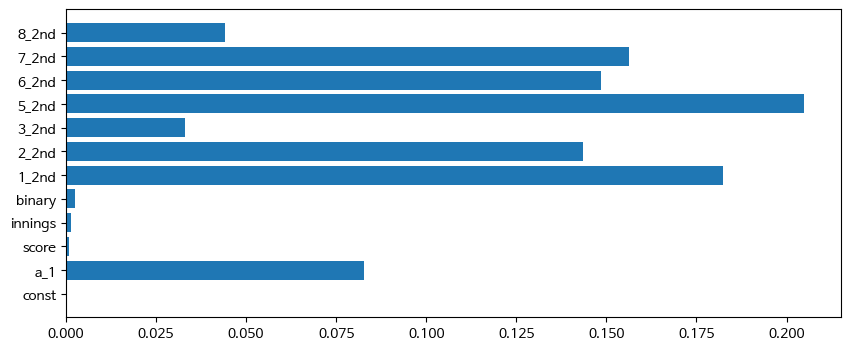

In [110]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, accuracy_score

xgb = XGBClassifier()

x_train, x_test , y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.3, random_state = 123)


xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)

f1 = f1_score(y_test, y_pred)
accu = accuracy_score(y_test, y_pred)
print(f1, acc)

plt.figure(figsize = (10, 4))
plt.barh(xgb.feature_names_in_ , xgb.feature_importances_ )

#### üìä ÌÜµÍ≥ÑÎ∂ÑÏÑù
###### ‚úÖ 5. Ï†úÌíà AÏùò Î∂àÎüâÎ•†ÏùÄ 0.03Ïù¥Îã§. 25Í∞úÏùò Ï†úÌíàÏùÑ ÎΩëÏïòÏùÑ Îïå 3Í∞úÍ∞Ä Î∂àÎüâÏùº ÌôïÎ•†

In [113]:
from scipy.stats import binom, norm
p = 0.03
n = 25

rv = binom(n, p)
print(rv.pmf(3))

0.03177384363983214


###### ‚úÖ 6. CÏÇ¨ ÏÉùÏÇ∞ Ï†úÌíà 1000Í∞ú Ï§ë ÏñëÌíàÏù¥ 600Í∞ú, DÏÇ¨ ÏÉùÏÇ∞ Ï†úÌíà 500Í∞ú Ï§ë ÏñëÌíàÏù¥ 200Í∞ú Ïù¥Îã§. Îëê ÌöåÏÇ¨Ïùò ÏñëÌíàÎ•†Ïóê Ï∞®Ïù¥Í∞Ä ÏûàÎäîÏßÄ Í≤ÄÏ†ï

In [114]:
# Í∑ÄÎ¨¥Í∞ÄÏÑ§ H‚ÇÄ: Îëê ÌöåÏÇ¨Ïùò ÏñëÌíàÎ•†ÏùÄ Í∞ôÎã§. (p‚ÇÅ = p‚ÇÇ)
# ÎåÄÎ¶ΩÍ∞ÄÏÑ§ H‚ÇÅ: Îëê ÌöåÏÇ¨Ïùò ÏñëÌíàÎ•†ÏùÄ Îã§Î•¥Îã§. (p‚ÇÅ ‚â† p‚ÇÇ)

# ÌíÄÏù¥1)
n1 = 1000
p1 = 600 / 1000

n2 = 500
p2 = 200/ 500

confa = 0.05

# Ï∞®Ïù¥
d = p1 - p2

# Ìï©ÎèôÎ∂ÑÏÇ∞
pool = (n1*p1 + n2 * p2) / (n1 + n2)
# SE
se = np.sqrt(pool * (1- pool) / n1 +pool * (1- pool) / n2 )

# z_value
z_stat = d / se

# p_value
p_val = 2 * (1 - norm.cdf(abs(z_stat)))
print(p_val)

2.4935609133081016e-13


In [115]:
# ÌíÄÏù¥ 2) 2-Proportion z-test
from statsmodels.stats.proportion import proportions_ztest

sucess = [600, 200]
nobs = [1000, 500]

stat, p_val = proportions_ztest(sucess, nobs)
print(p_val)

2.493596474326038e-13


###### ‚úÖ 7. ÏïÑÎûò Îç∞Ïù¥ÌÑ∞Îäî a,b,c,d ÎÑ§ Ï∞®Ï¢Ö Í∞ÅÍ∞Å 5Ìöå Ïã§Ìóò Ïãú Î≤îÌçº ÌååÏÜê Ï†ïÎèÑ Ïù¥Îã§. </br>  (Îã®, Í∞Å Î™®ÏßëÎã®ÏùÄ Ï†ïÍ∑úÎ∂ÑÌè¨Î•º Îî∞Î•¥Î©∞ Î™®ÏßëÎã® Í∞Ñ Îì±Î∂ÑÏÇ∞ÏÑ±ÏùÑ Í∞ÄÏ†ïÌïúÎã§.)

###### ‚úÖ 7-1 . Í∞Å Ï∞®Ï¢Ö Î≥Ñ Î≤îÌçº ÌååÏÜêÏùò Ï†ïÎèÑÏóê Ï∞®Ïù¥Í∞Ä Ïú†ÏùòÌïúÏßÄ Í≤ÄÏ†ï

In [134]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/29/p7.csv')
df.head()

name      ratio
0    A  10.993428
1    A   9.723471
2    A  11.295377
3    A  13.046060
4    A   9.531693

In [135]:
from scipy.stats import stats

name = 'name'
var = 'ratio'

anova = stats.f_oneway(*[group[var].values for name, group in df.groupby(name)])
print(anova[0])
print(anova[1])

print("""
Í∑ÄÎ¨¥Í∞ÄÏÑ§ : Ï∞®Ï¢ÖÎ≥Ñ Î≤îÌçº ÌååÏÜêÏùò Ï†ïÎèÑÏóê Ï∞®Ïù¥Í∞Ä ÏóÜÎã§
ÎåÄÎ¶ΩÍ∞ÄÏÑ§ : Ï∞®Ï¢ÖÎ≥Ñ Î≤îÌçº ÌååÏÜêÏùò Ï†ïÎèÑÏóê Ï∞®Ïù¥Í∞Ä ÏûàÎã§.
p_value : 2.8174779556216382e-06 < alpha 0.05 Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌï®ÏúºÎ°ú, Ï∞®Ï¢ÖÎ≥Ñ Î≤îÌçº ÌååÏÜêÏùò Ï†ïÎèÑÏóê Ï∞®Ïù¥Í∞Ä ÏûàÎã§

""")

24.97695307518529
2.8174779556216382e-06

Í∑ÄÎ¨¥Í∞ÄÏÑ§ : Ï∞®Ï¢ÖÎ≥Ñ Î≤îÌçº ÌååÏÜêÏùò Ï†ïÎèÑÏóê Ï∞®Ïù¥Í∞Ä ÏóÜÎã§
ÎåÄÎ¶ΩÍ∞ÄÏÑ§ : Ï∞®Ï¢ÖÎ≥Ñ Î≤îÌçº ÌååÏÜêÏùò Ï†ïÎèÑÏóê Ï∞®Ïù¥Í∞Ä ÏûàÎã§. 
p_value : 2.8174779556216382e-06 < alpha 0.05 Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌï®ÏúºÎ°ú, Ï∞®Ï¢ÖÎ≥Ñ Î≤îÌçº ÌååÏÜêÏùò Ï†ïÎèÑÏóê Ï∞®Ïù¥Í∞Ä ÏûàÎã§




In [139]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd , MultiComparison

df['name'] = df['name'].astype('category')
df['ratio'] = pd.to_numeric(df['ratio'])

# Perform Tukey's HSD post-hoc test
tukey = pairwise_tukeyhsd(df['ratio'], df['name'].cat.codes, alpha = 0.05)
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     0      1   5.3934  0.001   2.1785  8.6083   True
     0      2  -4.2156 0.0085  -7.4305 -1.0007   True
     0      3  -0.7086 0.9207  -3.9235  2.5063  False
     1      2   -9.609    0.0 -12.8239 -6.3941   True
     1      3   -6.102 0.0003  -9.3169 -2.8871   True
     2      3    3.507 0.0302   0.2921  6.7219   True
-----------------------------------------------------


###### ‚úÖ 7-2  L1,L2,L3 ÏÑ∏ Í∞úÏùò ÏÉùÏÇ∞ÎùºÏù∏ÏóêÏÑú Í∞ÅÍ∞Å 13%, 37%, 50%Î•º ÏÉùÏÇ∞ÌïòÎ©∞ Í∞ÅÍ∞Å 1.1% , 2.1%, 3.3% Î∂àÎüâÎ•†ÏùÑ Í∞ñÎäîÎã§. Î∂àÎüâ Ï†úÌíàÏù¥ ÎÇòÏôîÏùÑ Îïå L1 ÎùºÏù∏ÏóêÏÑú ÏÉùÏÇ∞ÎêòÏóàÏùÑ ÌôïÎ•†

In [143]:
l1 = 0.13
l2 = 0.37
l3 = 0.5

r1 = 0.011
r2 = 0.021
r3 = 0.033

# Î∂àÎüâÌíà ÏÉùÏÇ∞
total_p = l1 * r1 + l2 * r2 + l3 * r3

# L1Ïùº Í≤ΩÏö∞
L1_p = (l1 * r1) / total_p
L1_p

0.055642023346303505